In [ ]:
import nltk
nltk.download("book")
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
list(bigrams(text1))

In [ ]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)

In [ ]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

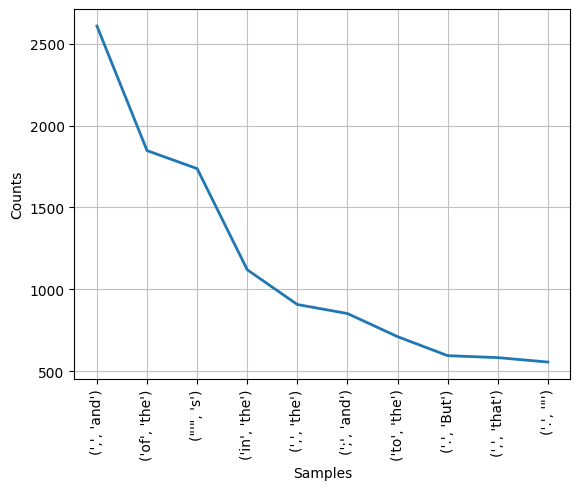

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(10)

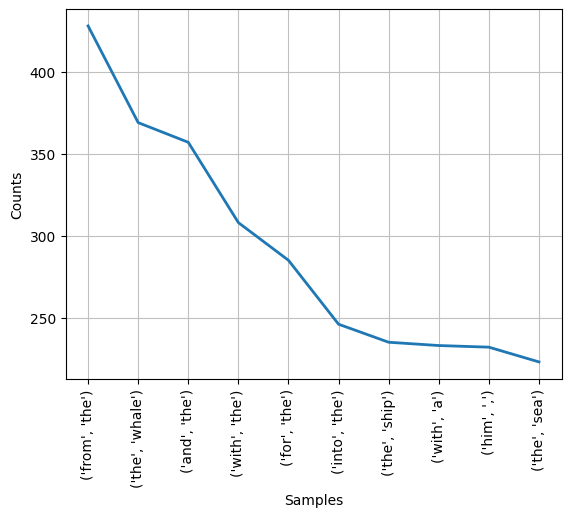

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
trheshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if  len(bigram[0])>trheshold and len(bigram[0])> trheshold]
filtered_bigrams_dist = FreqDist(filtered_bigrams)
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(10)

In [ ]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1,3))
fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

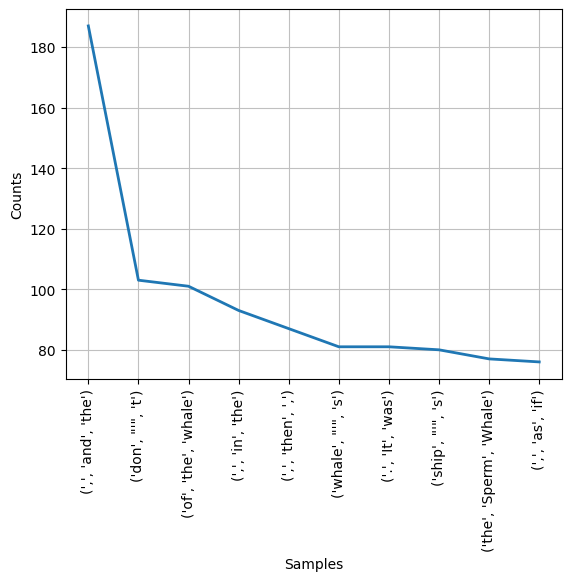

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(10)

Colocaciones
DataFrame  = es parecido a un excel vacio pero en pandas
La segunda linea append los bi grams filtrados a la "Tabla excel"

In [ ]:
filtered_words = [word for word in text1 if len(word)>trheshold]
filtered_words_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df['bi_grams'] =list(set(filtered_bigrams))
df['word_0'] = df['bi_grams'].apply(lambda x: x[0])
df['word_1'] =df['bi_grams'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_grams'].apply(lambda x: filtered_bigrams_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_words_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_words_dist[x])

In [ ]:
df

bi_grams    word_0    word_1  bi_gram_freq  word_0_freq  \
0           (round, his)     round       his            13          242   
1      (dragging, after)  dragging     after             1            7   
2        (our, northern)       our  northern             1          199   
3             (offer, ,)     offer         ,             1            8   
4           (glory, and)     glory       and             1           17   
...                  ...       ...       ...           ...          ...   
96775    (tiger, yellow)     tiger    yellow             1           10   
96776        (diet, --")      diet       --"             1            3   
96777       (but, their)       but     their             3         1113   
96778        (comes, at)     comes        at             1           52   
96779          (him, be)       him        be             3         1058   

       word_1_freq  
0             2459  
1              252  
2                7  
3                0  
4             6024  
...            ...  
96775           22  
96776           95  
96777          612  
96778            0  
96779            0  

[96780 rows x 6 columns]

Pointwise Mutual Information(PMI)

In [ ]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x: np.log2(x.values[0]/(x.values[1]*x.values[2])) , axis = 1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

<ipython-input-41-53eb8013af51>:1: RuntimeWarning: divide by zero encountered in long_scalars
  df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x: np.log2(x.values[0]/(x.values[1]*x.values[2])) , axis = 1)


bi_grams    word_0    word_1  bi_gram_freq  word_0_freq  \
0           (round, his)     round       his            13          242   
1      (dragging, after)  dragging     after             1            7   
2        (our, northern)       our  northern             1          199   
3             (offer, ,)     offer         ,             1            8   
4           (glory, and)     glory       and             1           17   
...                  ...       ...       ...           ...          ...   
96775    (tiger, yellow)     tiger    yellow             1           10   
96776        (diet, --")      diet       --"             1            3   
96777       (but, their)       but     their             3         1113   
96778        (comes, at)     comes        at             1           52   
96779          (him, be)       him        be             3         1058   

       word_1_freq        PMI  log(bi_gram_freq)  
0             2459 -15.482280           3.700440  
1              252 -10.784635           0.000000  
2                7 -10.443980           0.000000  
3                0        inf           0.000000  
4             6024 -16.643969           0.000000  
...            ...        ...                ...  
96775           22  -7.781360           0.000000  
96776           95  -8.154818           0.000000  
96777          612 -17.792663           1.584963  
96778            0        inf           0.000000  
96779            0        inf           1.584963  

[96780 rows x 8 columns]

In [ ]:
df

bi_grams    word_0    word_1  bi_gram_freq  word_0_freq  \
0           (round, his)     round       his            13          242   
1      (dragging, after)  dragging     after             1            7   
2        (our, northern)       our  northern             1          199   
3             (offer, ,)     offer         ,             1            8   
4           (glory, and)     glory       and             1           17   
...                  ...       ...       ...           ...          ...   
96775    (tiger, yellow)     tiger    yellow             1           10   
96776        (diet, --")      diet       --"             1            3   
96777       (but, their)       but     their             3         1113   
96778        (comes, at)     comes        at             1           52   
96779          (him, be)       him        be             3         1058   

       word_1_freq        PMI  log(bi_gram_freq)  
0             2459 -15.482280           3.700440  
1              252 -10.784635           0.000000  
2                7 -10.443980           0.000000  
3                0        inf           0.000000  
4             6024 -16.643969           0.000000  
...            ...        ...                ...  
96775           22  -7.781360           0.000000  
96776           95  -8.154818           0.000000  
96777          612 -17.792663           1.584963  
96778            0        inf           0.000000  
96779            0        inf           1.584963  

[96780 rows x 8 columns]

In [ ]:
df.sort_values(by = 'PMI', ascending = False)

In [ ]:
fig = px.scatter(x =df['PMI'].values , y =df['log(bi_gram_freq)'], color = df['PMI']+df['log(bi_gram_freq)'], hover_name = df['bi_grams'].values ,width = 600, height = 600, labels = {'x': 'PMI' , 'y' : 'log(Bigram Frequency)'})
fig.show()

In [ ]:
from nltk.collocations import *
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [ ]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measure.pmi, 20)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other'),
 (',"', 'cried'),
 ('let', 'us'),
 ('on', 'board'),
 ('at', 'least'),
 ('sperm', 'whale'),
 ('cried', 'Stubb'),
 ('an', 'instant'),
 ('be', 'sure'),
 ('Captain', 'Ahab'),
 ('once', 'more')]

In [ ]:
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents()


[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [ ]:
corpus

In [ ]:
flatten_corpus = [w for l in corpus for w in l]

In [ ]:
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [ ]:
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measure.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]